# Análise Exploratória de Dados - Qualidade do Ar em Porto Alegre (Canoas/PUni)
**Autora:** Júlia Valandro Bonzanini
**Projeto:** Modelo Preditivo de Qualidade do Ar e Riscos à Saúde
**Disciplina:** Projeto Integrador de Ciência dos Dados III – UFMS Digital

---

## Objetivos da Análise Exploratória

1. Identificar padrões temporais e sazonais nos poluentes.
2. Analisar correlações entre poluentes e variáveis meteorológicas.
3. Detectar outliers e eventos extremos.
4. Compreender a distribuição e qualidade dos dados.
5. Gerar insights para a modelagem preditiva.


In [21]:
# Configuração inicial e carregamento dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pathlib import Path

# Configurações de estilo
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Diretórios
DATA_PATH = Path("../data/processed/air_quality_processed.csv")
FIGURES_PATH = Path("../reports/figures")
FIGURES_PATH.mkdir(parents=True, exist_ok=True)

# Leitura do dataset
df = pd.read_csv(DATA_PATH, parse_dates=["datetime"], index_col="datetime").sort_index()
print(f"Shape do dataset: {df.shape}")
df.head()


Shape do dataset: (1827, 29)


,CO_Canoas,NO2_Canoas,O3_Canoas,SO2_Canoas,PM10_Canoas,precipitacao,temperatura,temperatura_orvalho,umidade,vento_direcao,...,quarter,dayofweek,is_weekend,year,sin_dayofyear,cos_dayofyear,PM10_Canoas_lag_1,PM10_Canoas_lag_2,PM10_Canoas_lag_3,PM10_Canoas_lag_7
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00-03:00,NaN,3.439048,NaN,11.352174,23.741304,0.008333,27.270833,22.262500,74.750000,237.375000,...,1,2,0,2020,0.017202,0.999852,NaN,NaN,NaN,NaN
2020-01-02 00:00:00-03:00,NaN,0.470000,NaN,4.479583,13.910417,0.058333,23.870833,19.225000,75.625000,143.708333,...,1,3,0,2020,0.034398,0.999408,23.741304,NaN,NaN,NaN
2020-01-03 00:00:00-03:00,NaN,0.886667,NaN,5.090000,16.979524,0.025000,22.966667,17.387500,71.708333,124.916667,...,1,4,0,2020,0.051584,0.998669,13.910417,23.741304,NaN,NaN
2020-01-04 00:00:00-03:00,NaN,1.303333,NaN,4.931667,17.307917,0.008333,23.733333,18.100000,71.833333,109.500000,...,1,5,1,2020,0.068755,0.997634,16.979524,13.910417,23.741304,NaN
2020-01-05 00:00:00-03:00,NaN,1.720000,NaN,8.312917,14.810833,0.000000,25.283333,18.266667,67.833333,122.666667,...,1,6,1,2020,0.085906,0.996303,17.307917,16.979524,13.910417,NaN


## 1. Análise de Dados Faltantes
Vamos começar verificando a **completude dos dados** e identificando possíveis lacunas por variável e fonte.


CO_Canoas                    63.11
PM10_Canoas_lag_7            51.01
PM10_Canoas_lag_3            50.79
PM10_Canoas_lag_2            50.74
PM10_Canoas_lag_1            50.68
PM10_Canoas                  50.63
SO2_Canoas                   16.97
O3_Canoas                    16.80
NO2_Canoas                   16.75
precipitacao                  0.00
temperatura                   0.00
temperatura_orvalho           0.00
umidade                       0.00
frota_veicular                0.00
internacoes_respiratorias     0.00
vento_velocidade              0.00
vento_direcao                 0.00
focos_queimadas_count         0.00
focos_queimadas_frp_sum       0.00
focos_queimadas_frp_mean      0.00
focos_queimadas_frp_max       0.00
dayofweek                     0.00
quarter                       0.00
month                         0.00
dayofyear                     0.00
cos_dayofyear                 0.00
sin_dayofyear                 0.00
year                          0.00
is_weekend          

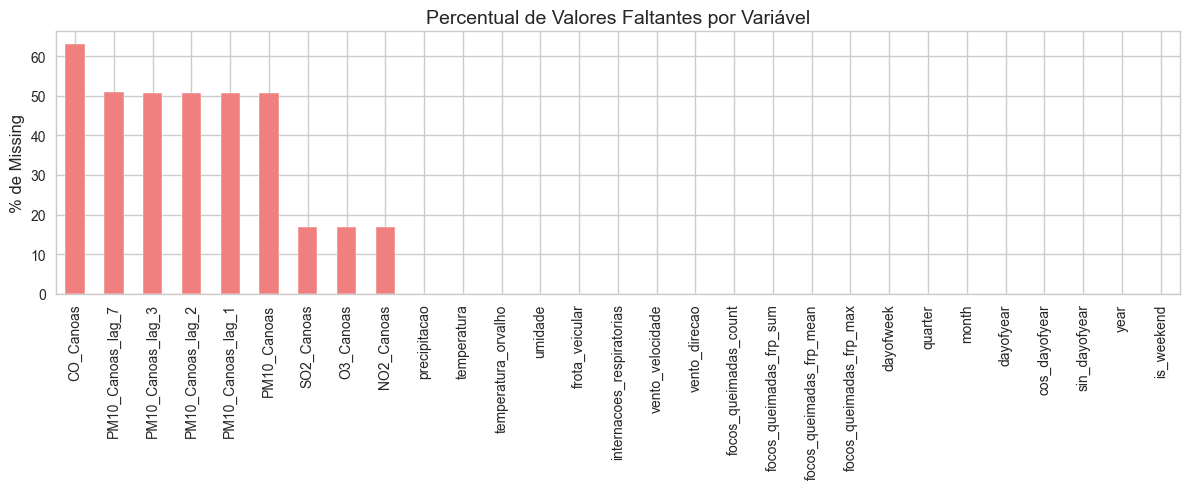

In [22]:
# Percentual de missing values
missing = df.isna().mean().sort_values(ascending=False) * 100
display(missing.round(2))

# Plot de missing values
plt.figure(figsize=(12,5))
missing.plot(kind="bar", color="lightcoral")
plt.title("Percentual de Valores Faltantes por Variável")
plt.ylabel("% de Missing")
plt.tight_layout()
plt.savefig(FIGURES_PATH / "missing_values.png")
plt.show()


## 2. Série Temporal dos Poluentes
Vamos visualizar a evolução temporal dos principais poluentes para observar tendências e possíveis anomalias.


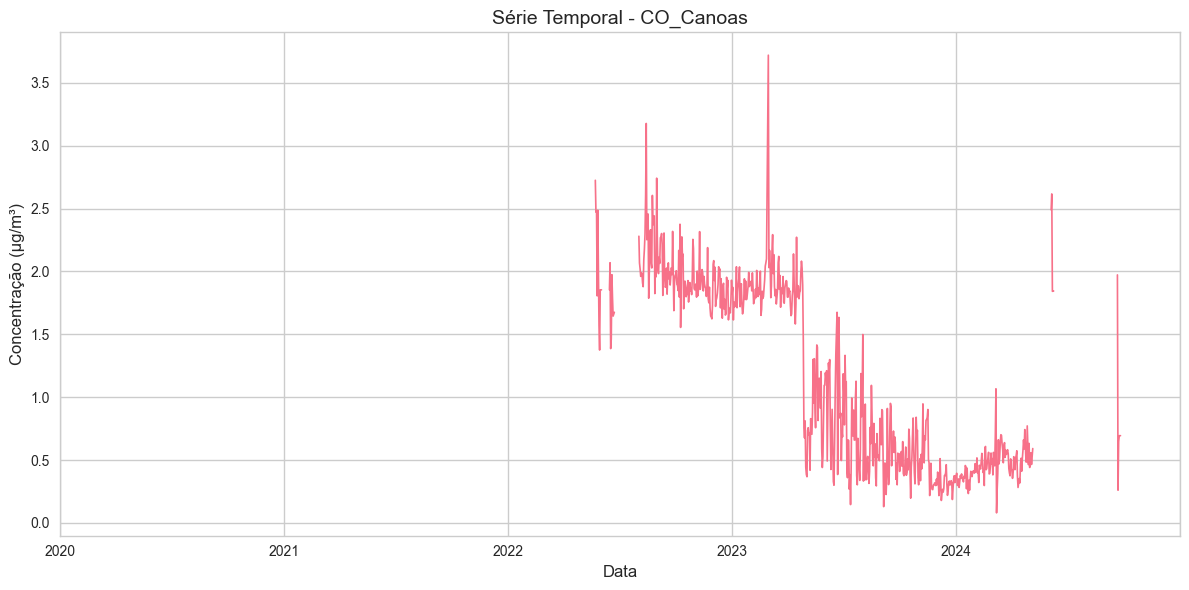

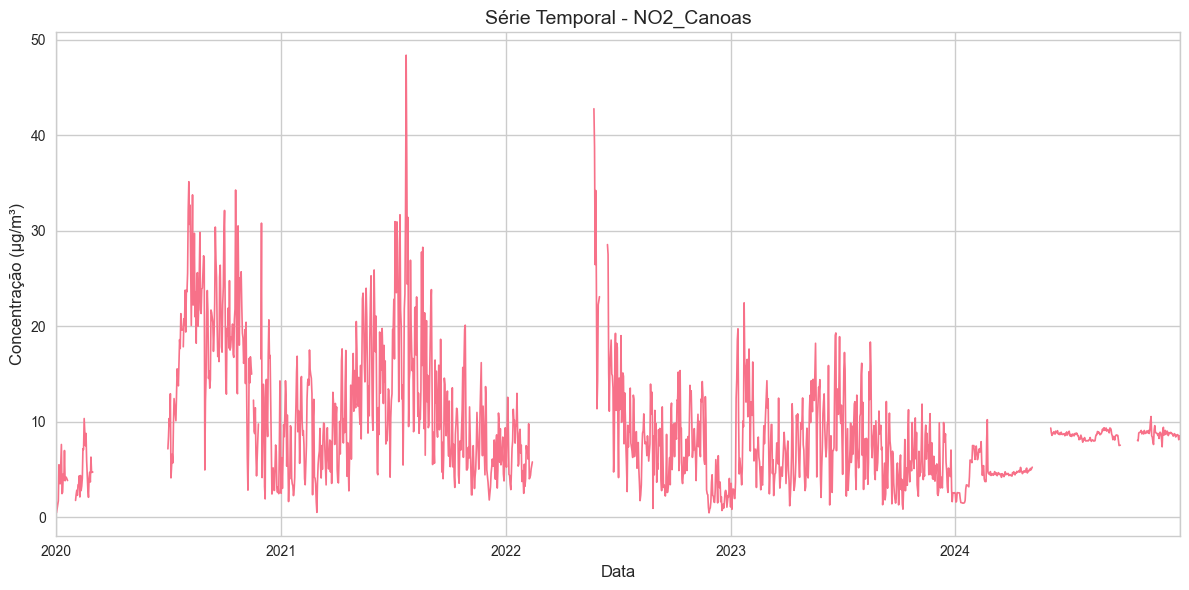

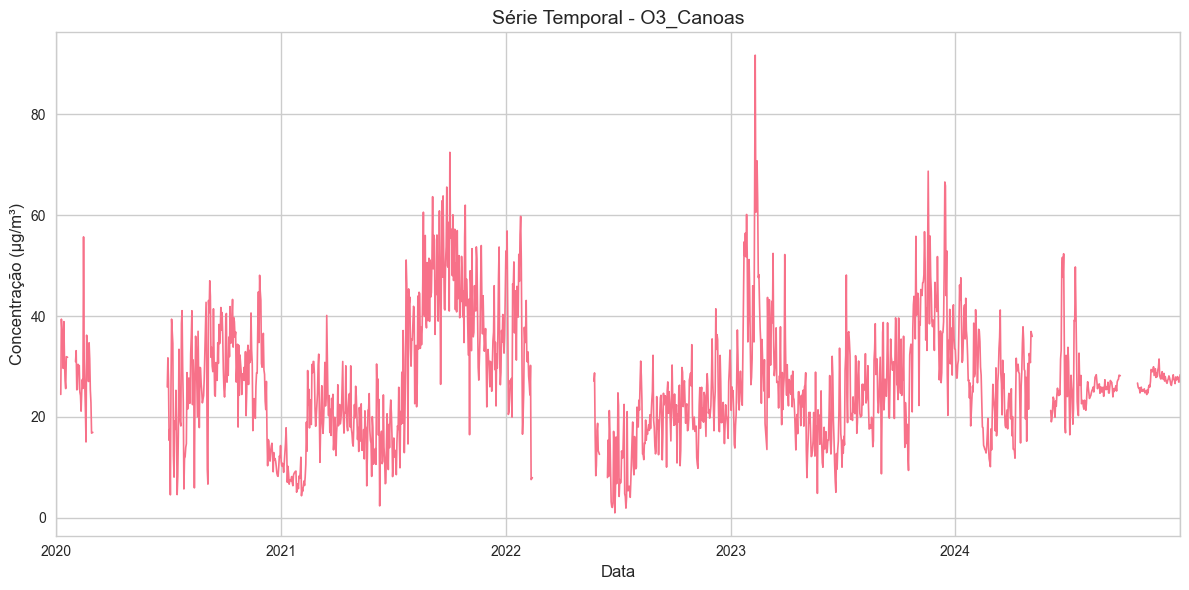

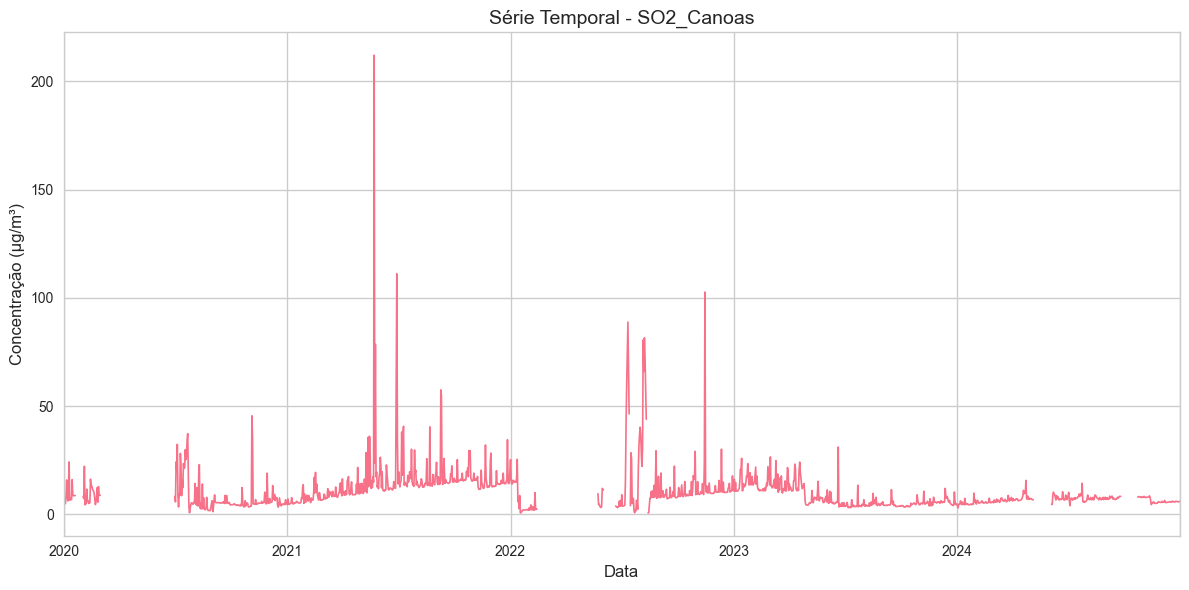

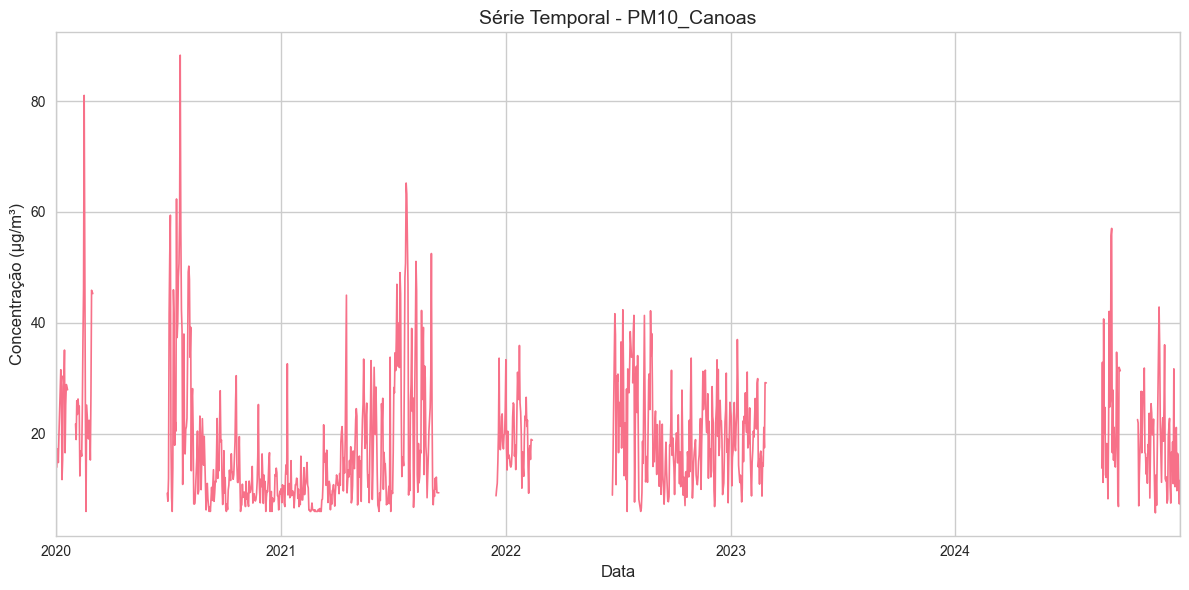

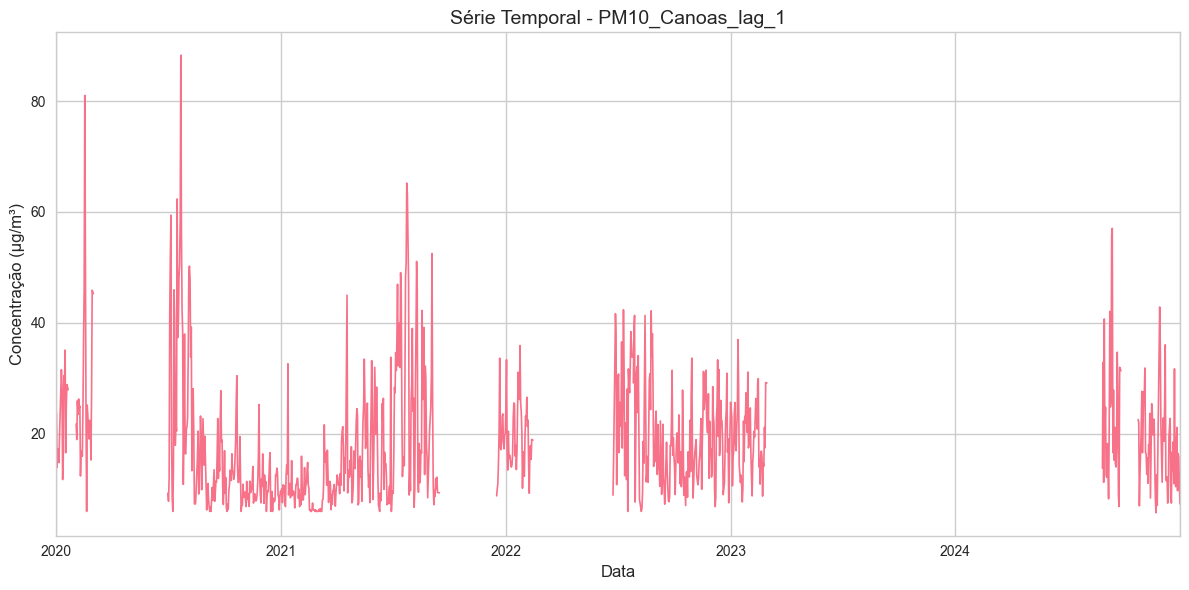

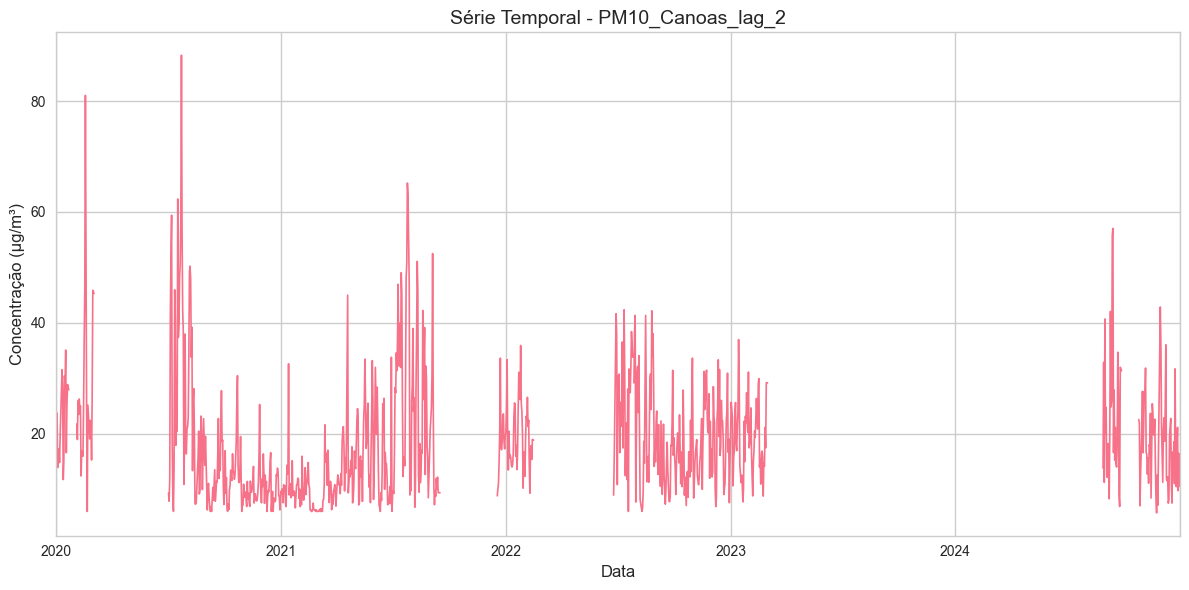

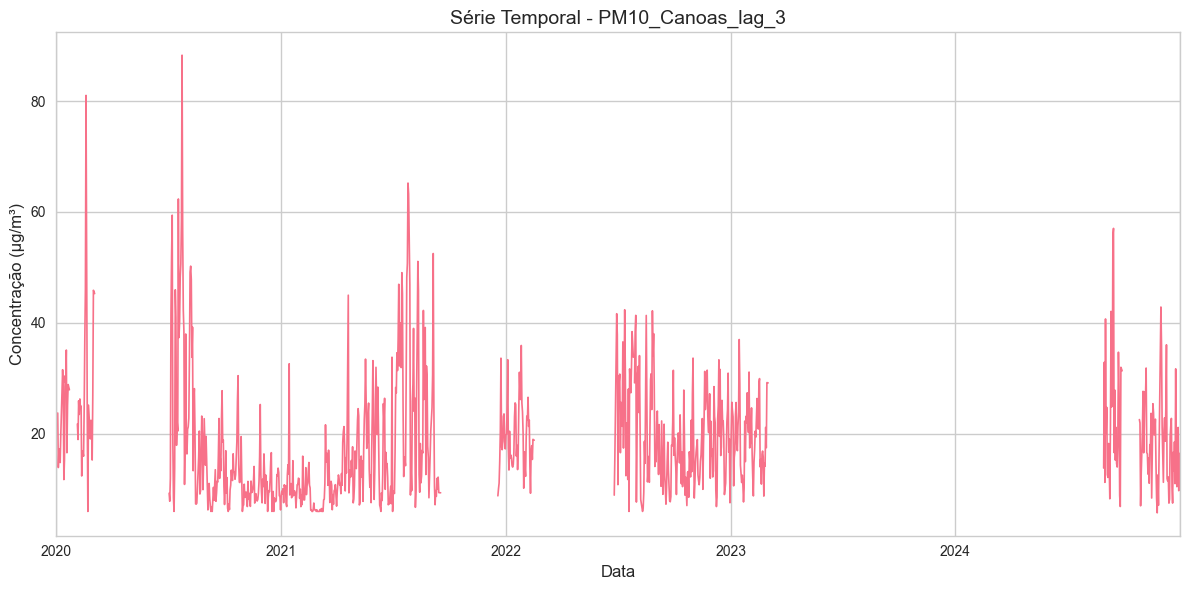

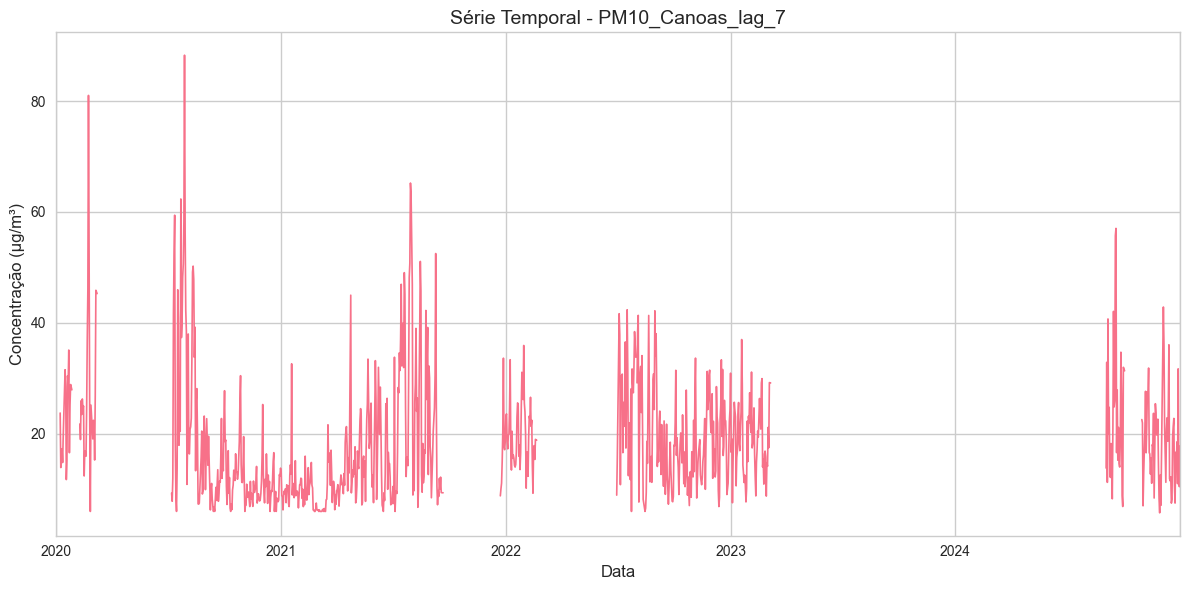

In [23]:
pollutants = [col for col in df.columns if any(p in col for p in ["PM10", "SO2", "NO2", "O3", "CO"])]

for col in pollutants:
    df[col].plot(lw=1.2)
    plt.title(f"Série Temporal - {col}")
    plt.xlabel("Data")
    plt.ylabel("Concentração (µg/m³)")
    plt.tight_layout()
    plt.savefig(FIGURES_PATH / f"serie_temporal_{col}.png")
    plt.show()


## 3. Decomposição Sazonal
A decomposição sazonal nos ajuda a entender a tendência, sazonalidade e ruído das séries temporais dos poluentes.


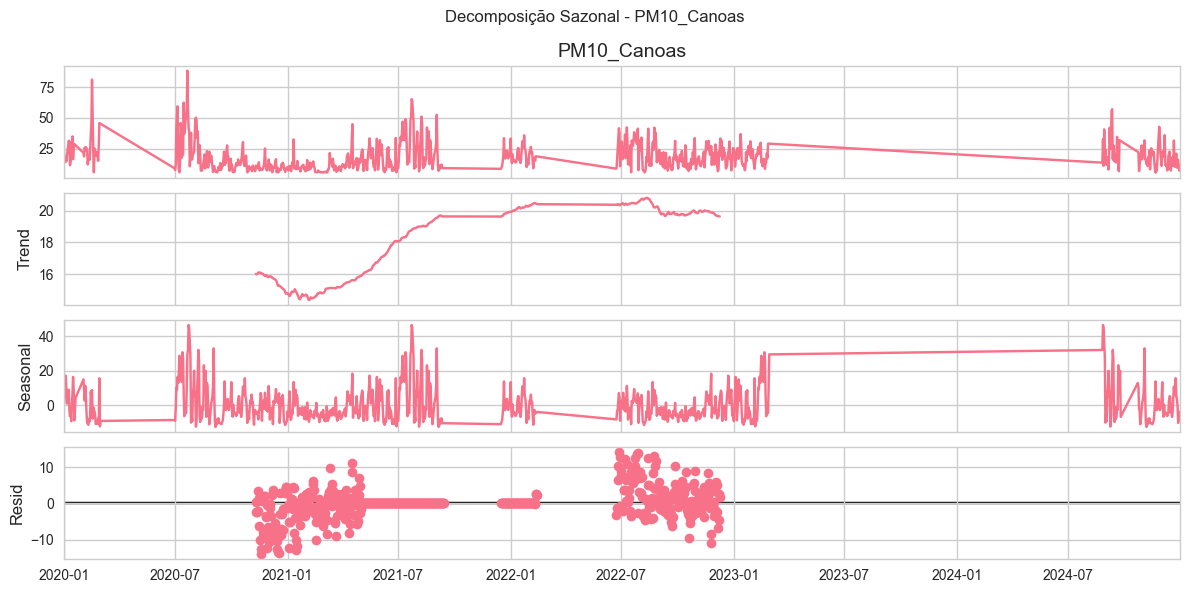

In [24]:
target = "PM10_Canoas"
decomposition = seasonal_decompose(df[target].dropna(), model="additive", period=365)
decomposition.plot()
plt.suptitle(f"Decomposição Sazonal - {target}")
plt.tight_layout()
plt.savefig(FIGURES_PATH / "decomposicao_sazonal_PM10_Canoas.png")
plt.show()


## 4. Análise de Correlações
Vamos avaliar as **relações lineares** entre poluentes e variáveis meteorológicas, como temperatura, umidade e vento.


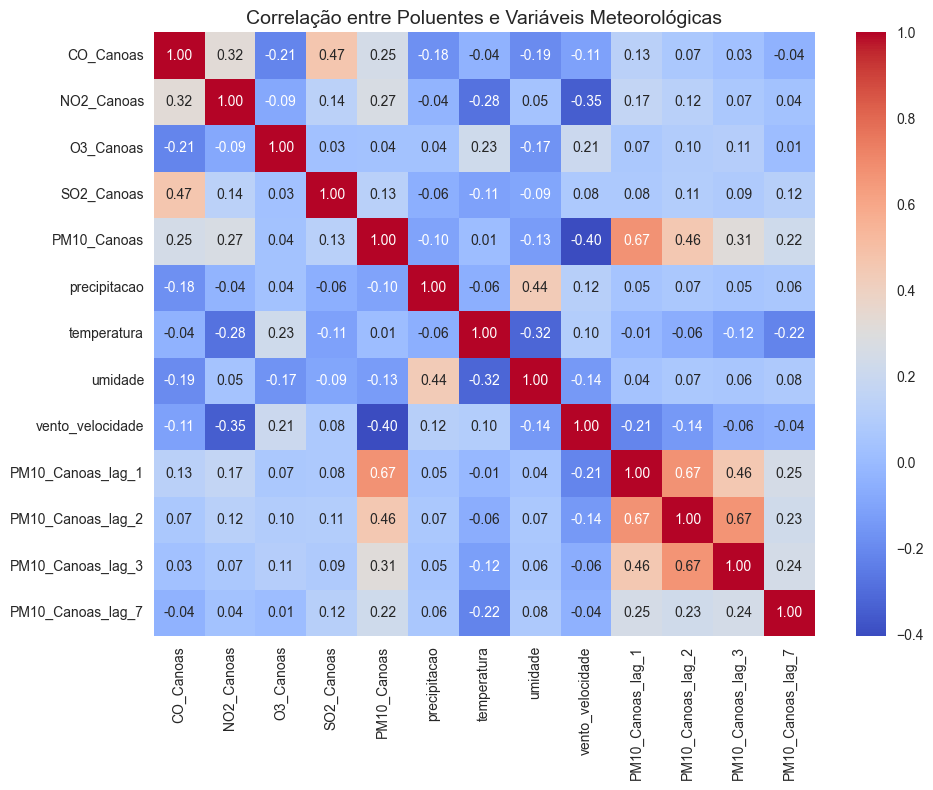

In [25]:
meteo_vars = ["temperatura", "umidade", "vento_velocidade", "precipitacao"]
corr_cols = [col for col in df.columns if col in pollutants + meteo_vars]

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Poluentes e Variáveis Meteorológicas")
plt.tight_layout()
plt.savefig(FIGURES_PATH / "heatmap_correlacao.png")
plt.show()


## 5. Análise Sazonal por Mês e Estação
Agora, vamos observar como os poluentes variam ao longo dos meses e estações do ano.


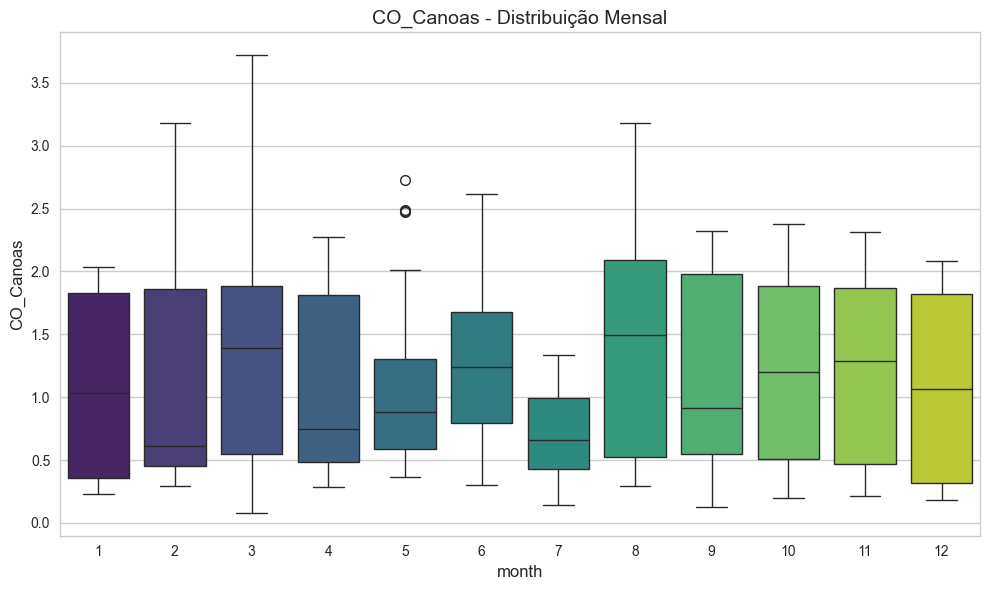

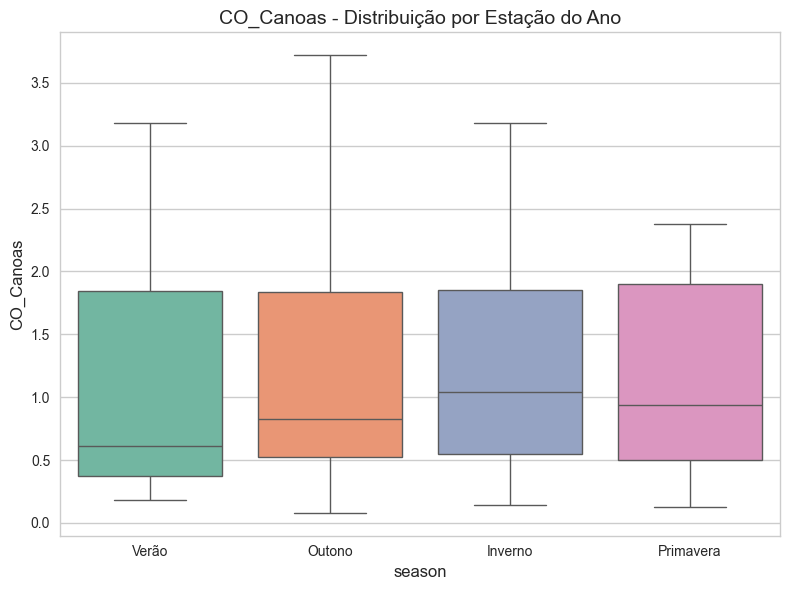

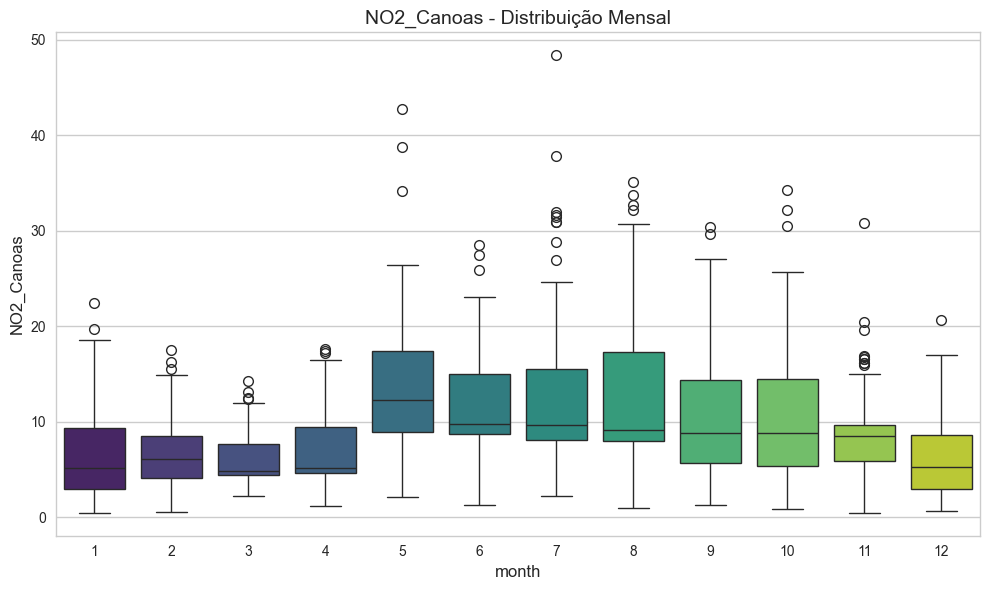

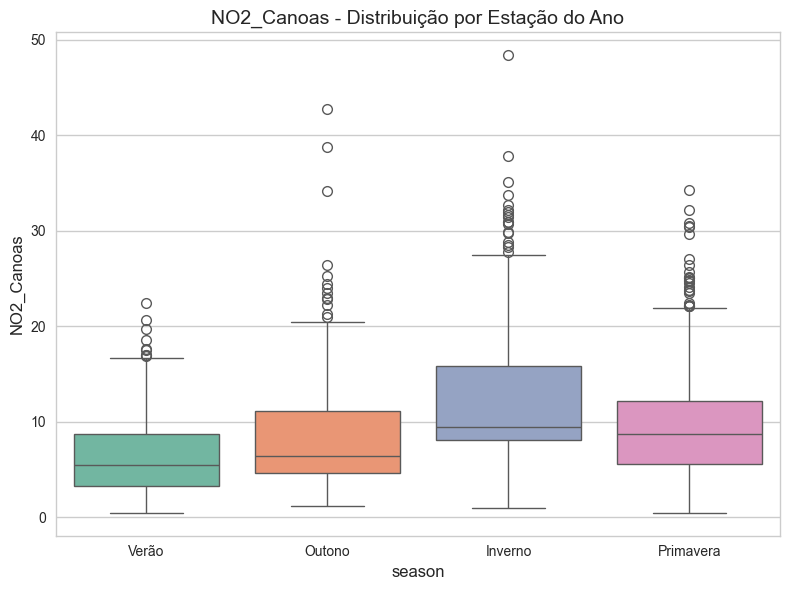

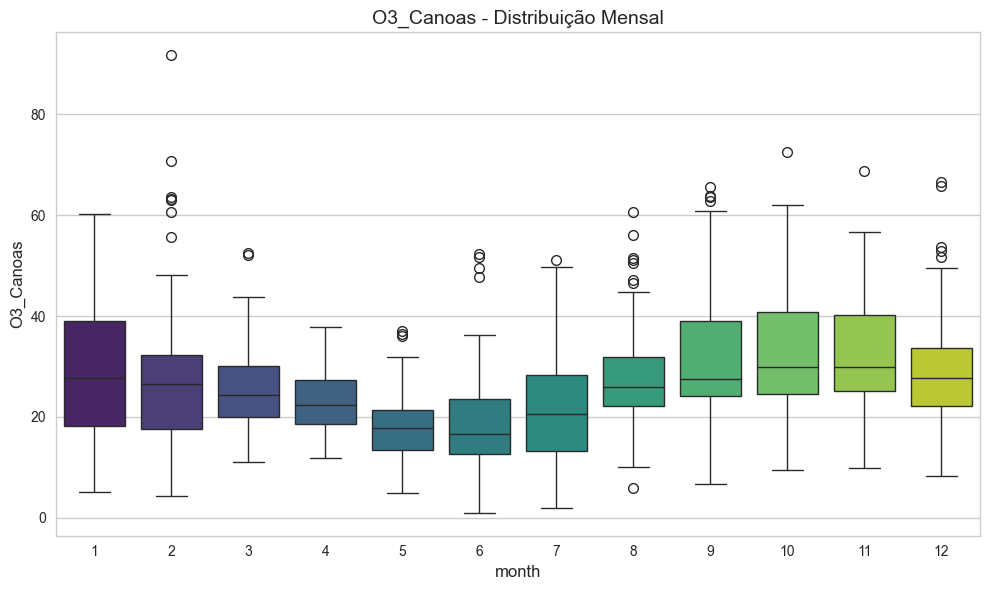

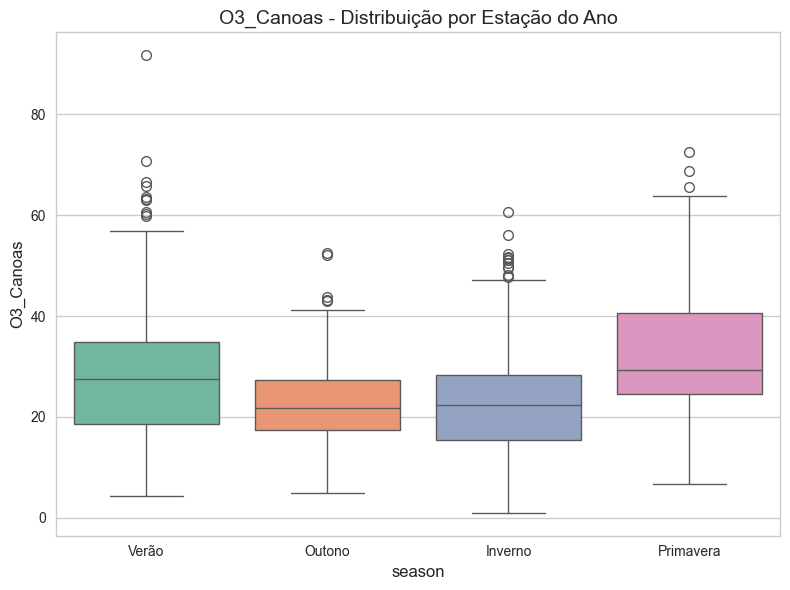

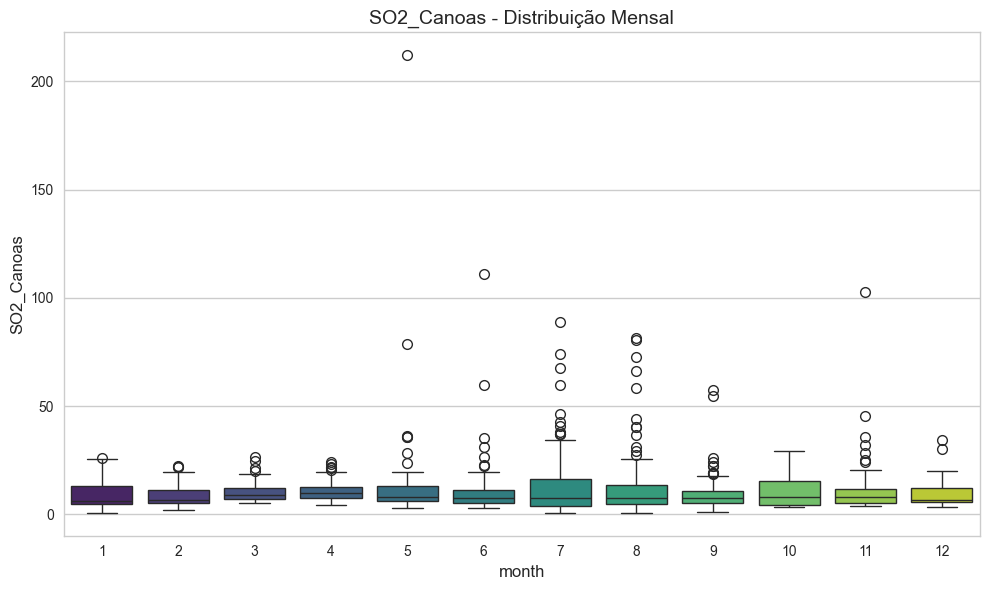

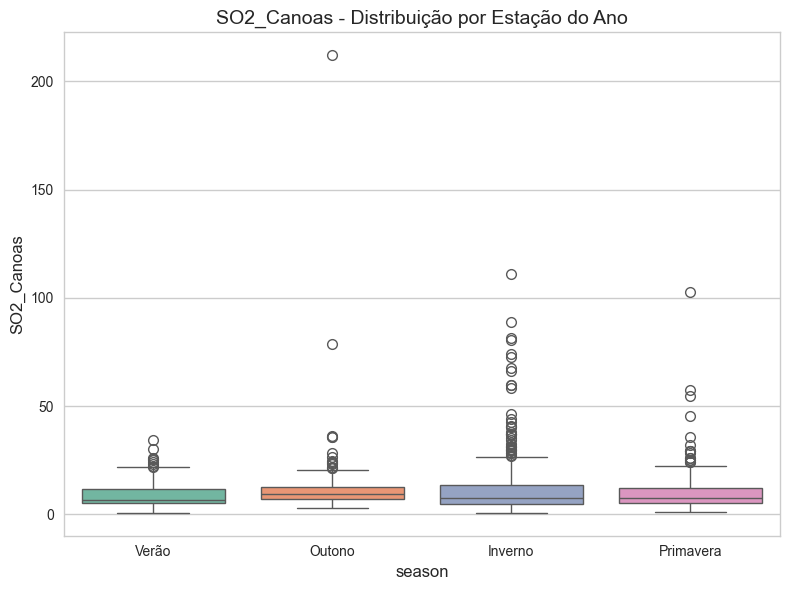

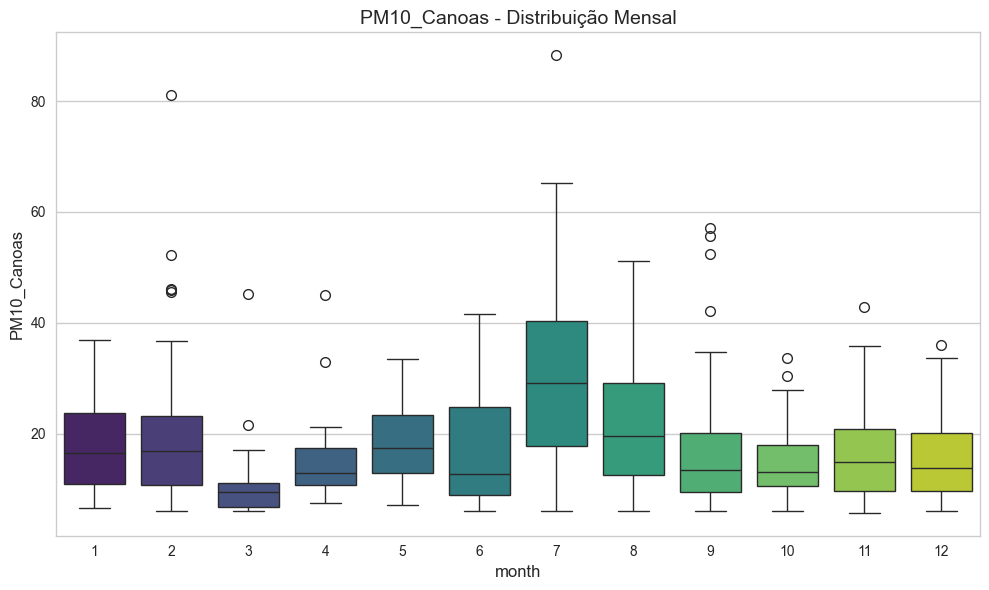

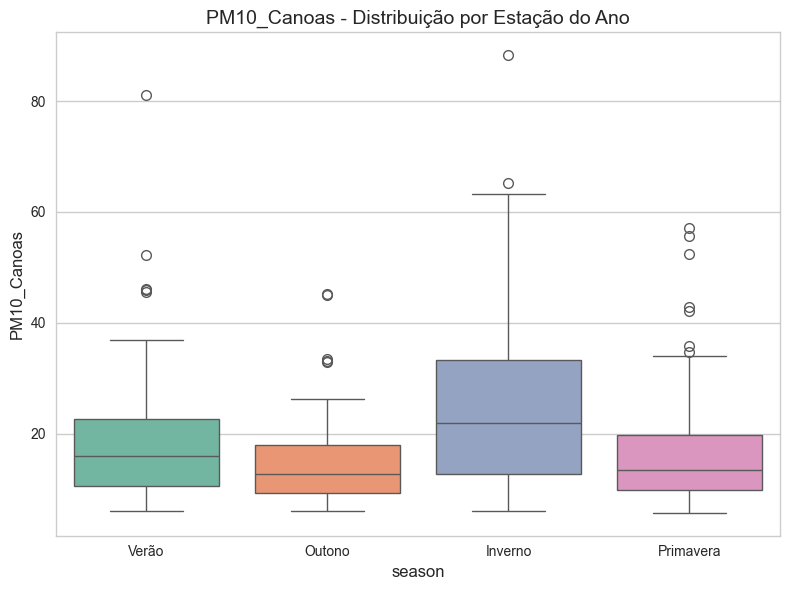

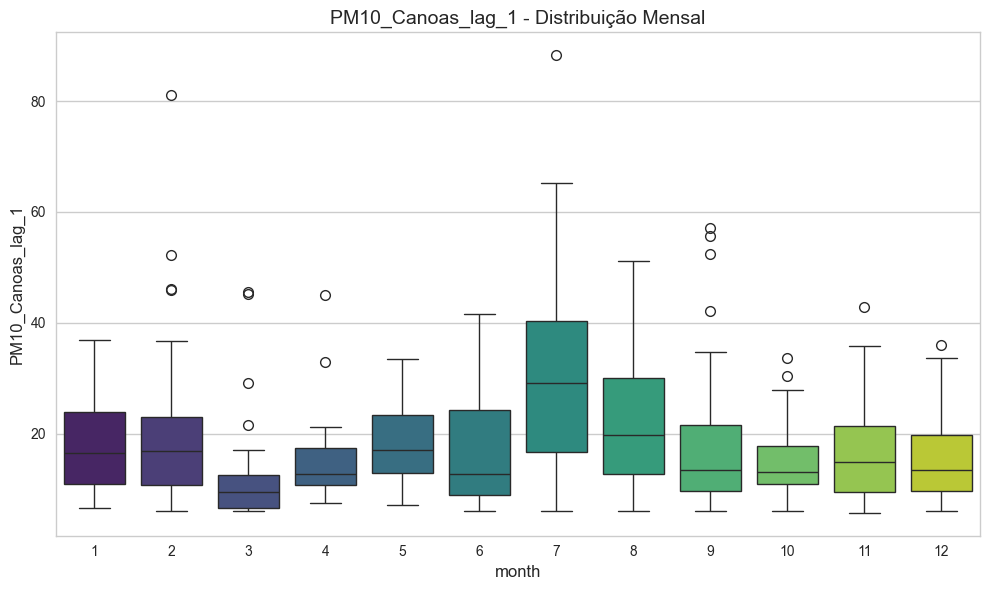

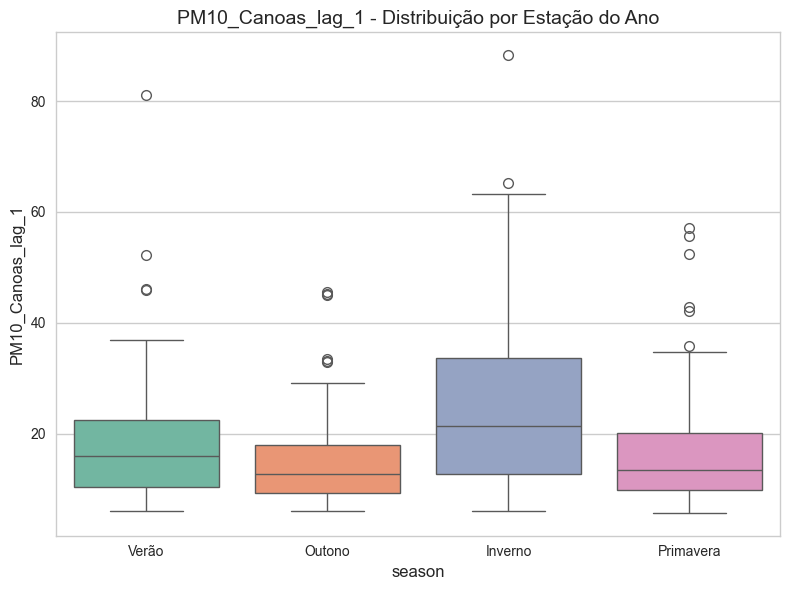

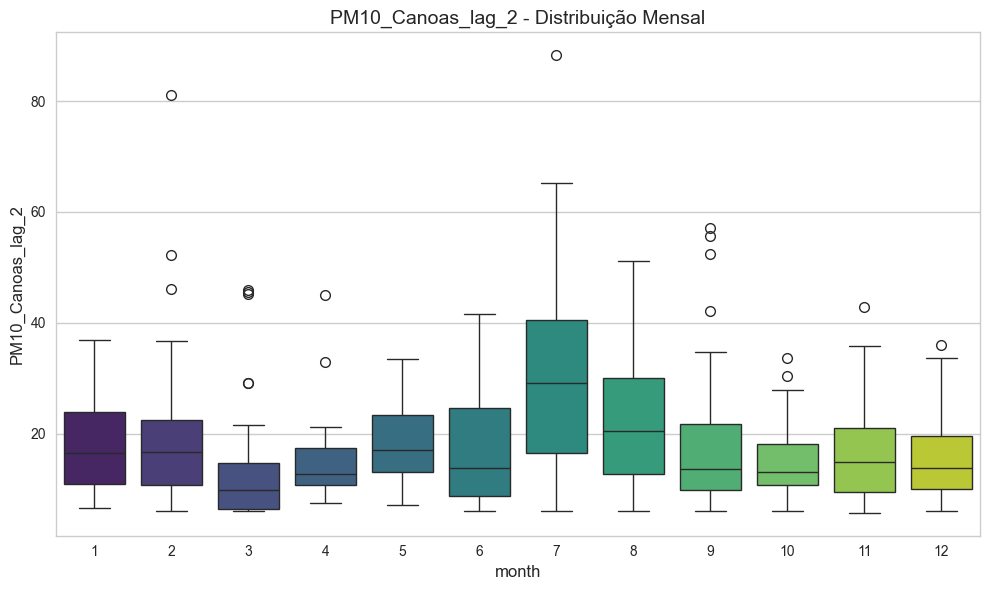

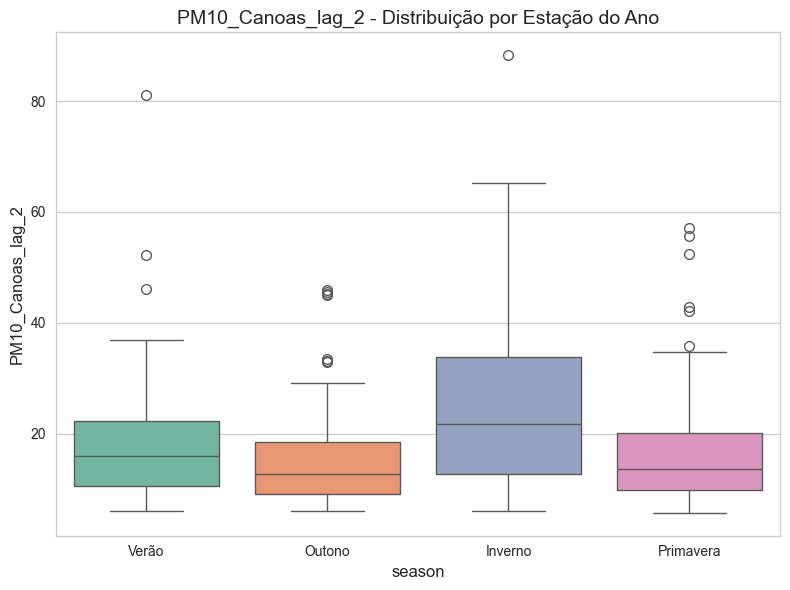

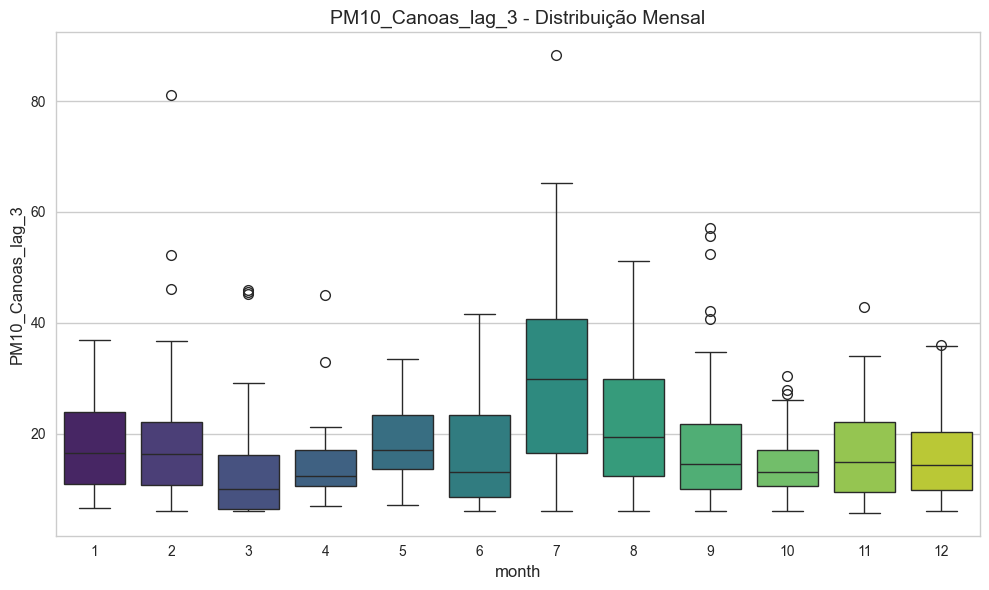

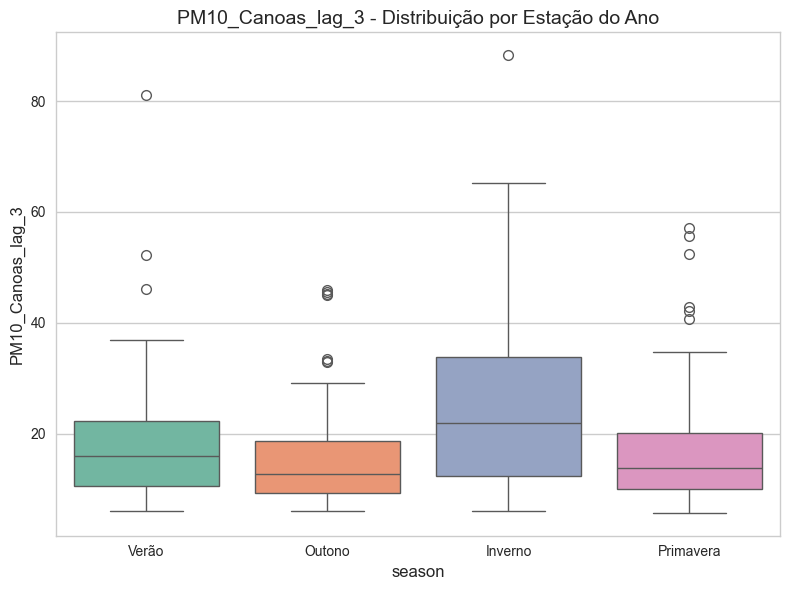

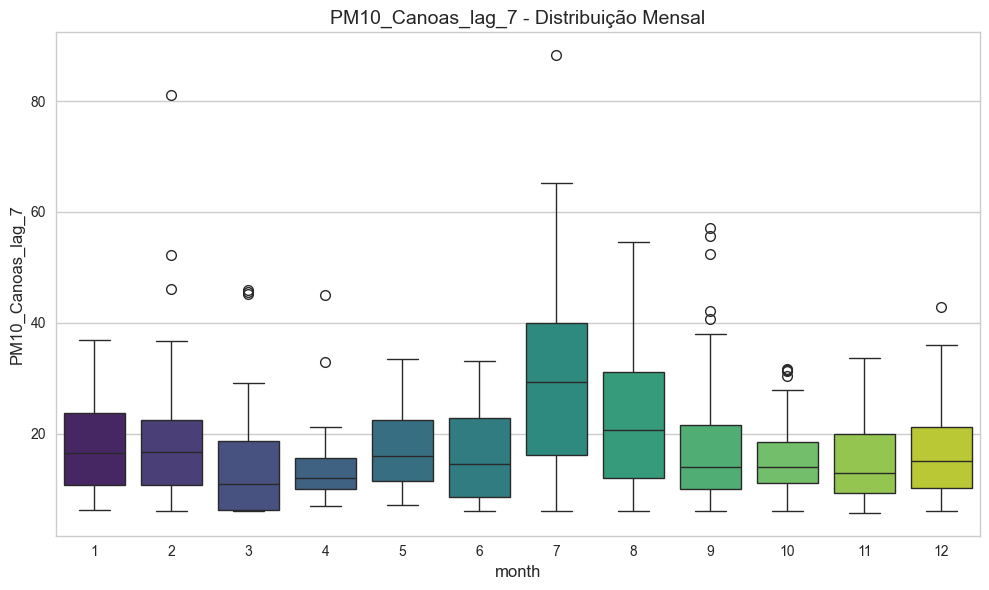

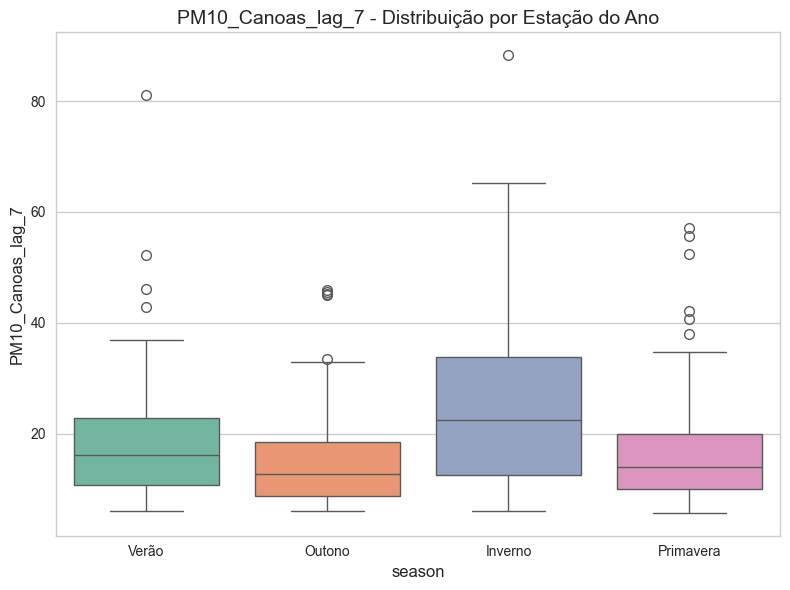

In [26]:
# Criar colunas auxiliares
df["month"] = df.index.month
df["season"] = df["month"] % 12 // 3 + 1
df["season"] = df["season"].map({1:"Verão", 2:"Outono", 3:"Inverno", 4:"Primavera"})

for col in pollutants:
    plt.figure(figsize=(10,6))
    sns.boxplot(x="month", y=col, data=df, palette="viridis")
    plt.title(f"{col} - Distribuição Mensal")
    plt.tight_layout()
    plt.savefig(FIGURES_PATH / f"boxplot_mensal_{col}.png")
    plt.show()

    plt.figure(figsize=(8,6))
    sns.boxplot(x="season", y=col, data=df, palette="Set2")
    plt.title(f"{col} - Distribuição por Estação do Ano")
    plt.tight_layout()
    plt.savefig(FIGURES_PATH / f"boxplot_estacao_{col}.png")
    plt.show()


## 6. Análise de Distribuição e Outliers
Vamos investigar a **distribuição dos poluentes** e possíveis **valores atípicos**, que podem indicar eventos anormais.


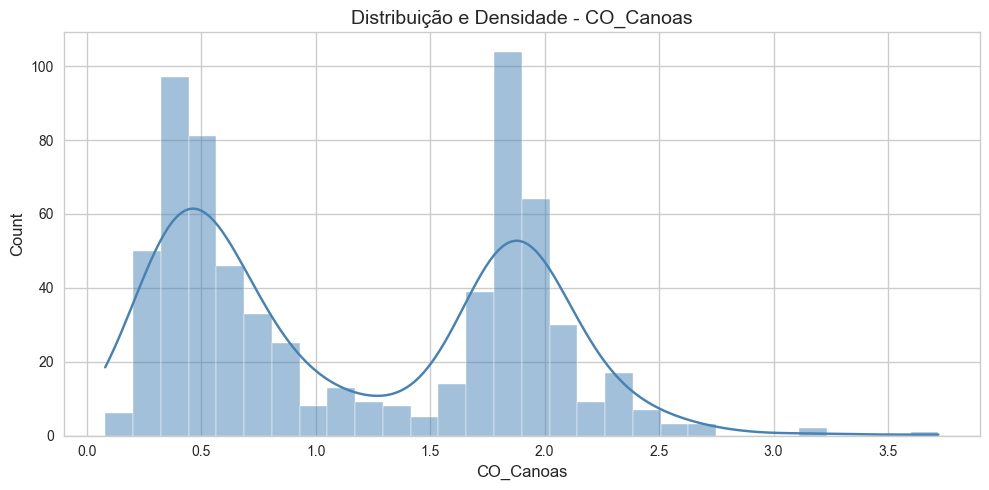

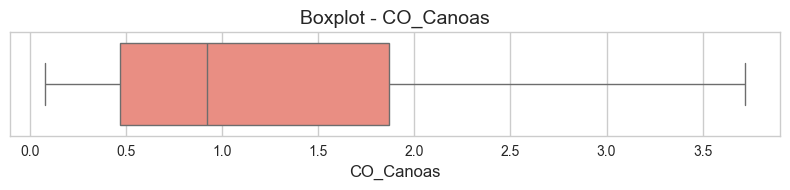

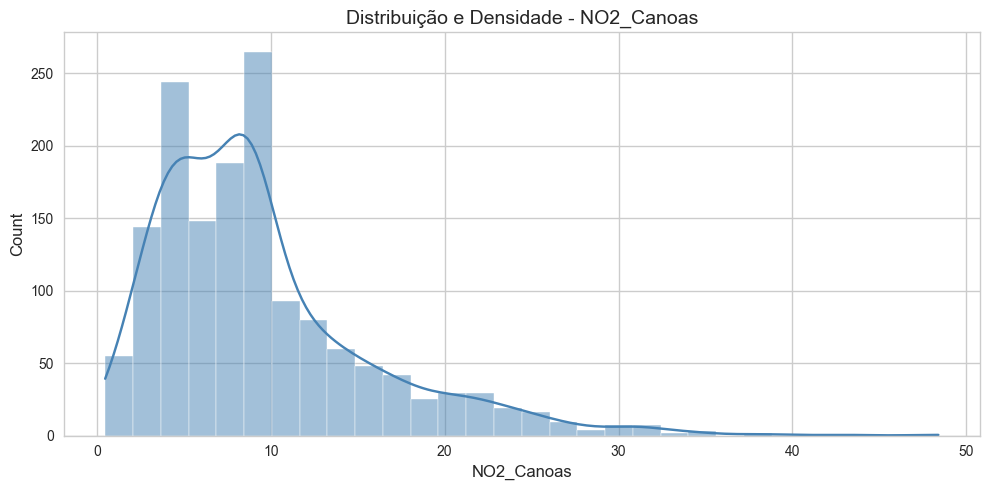

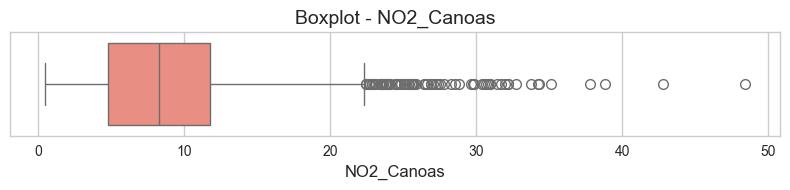

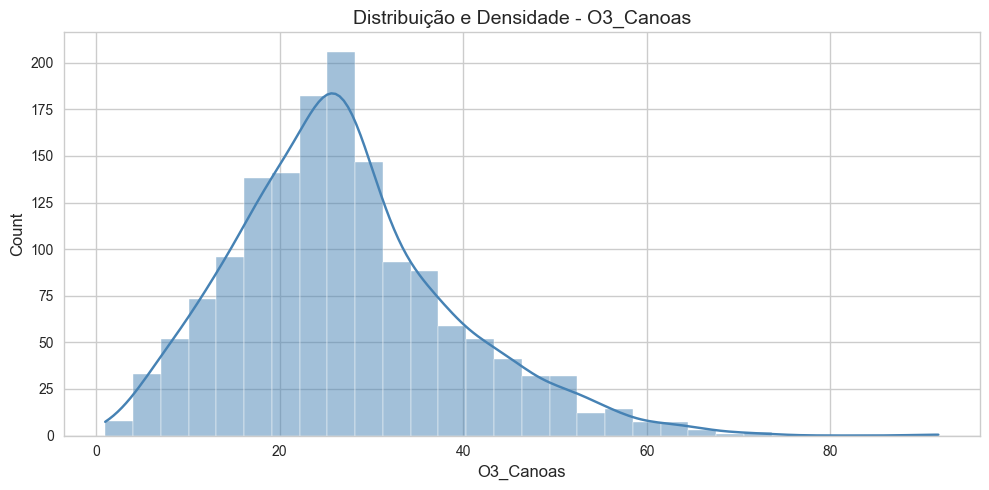

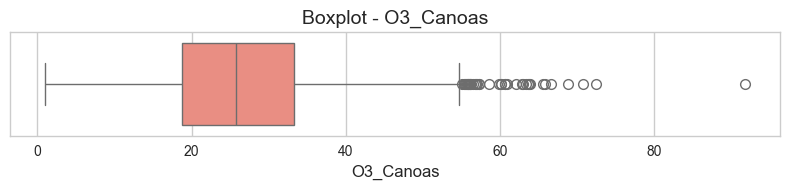

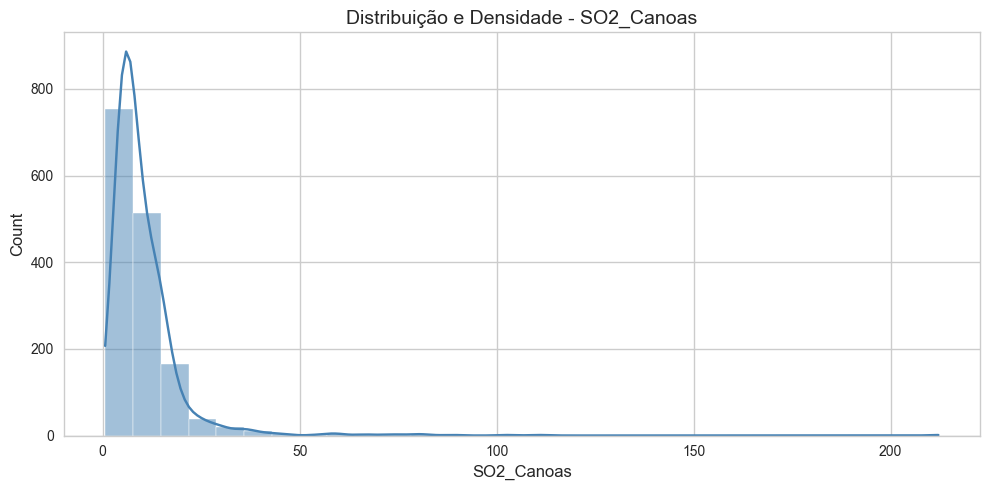

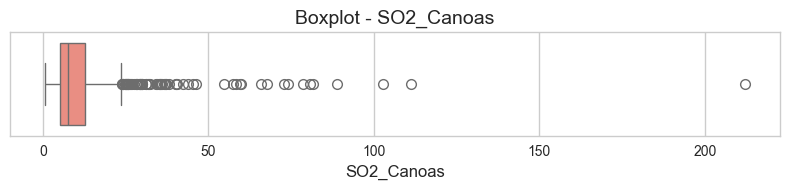

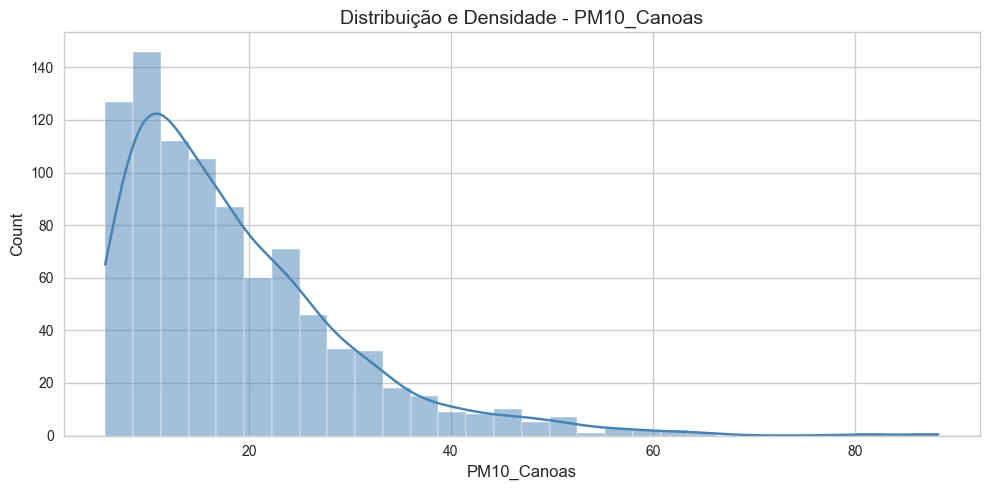

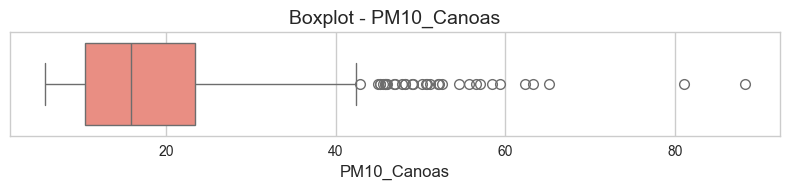

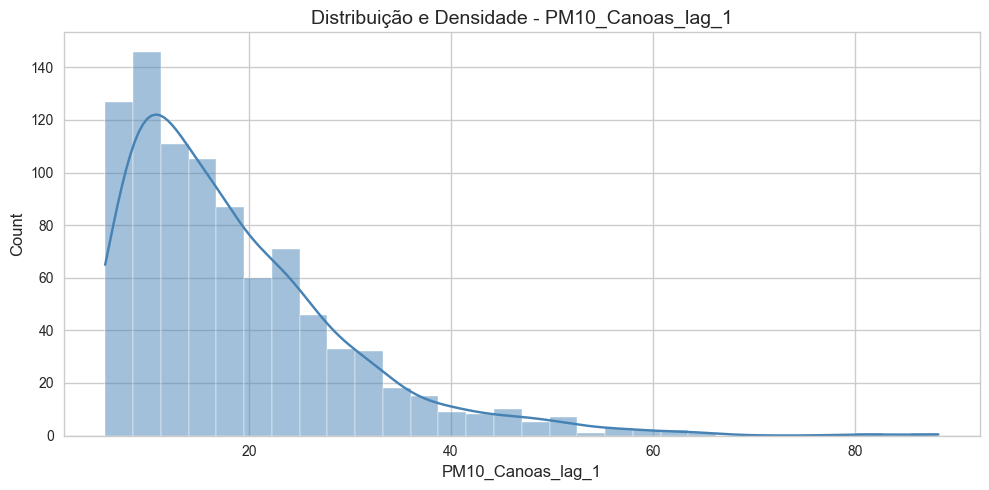

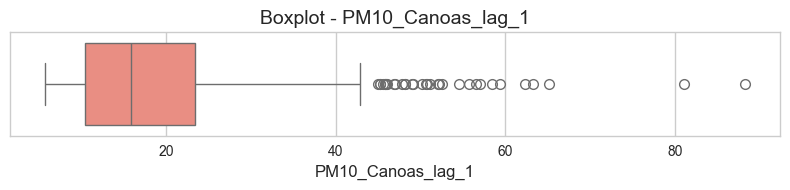

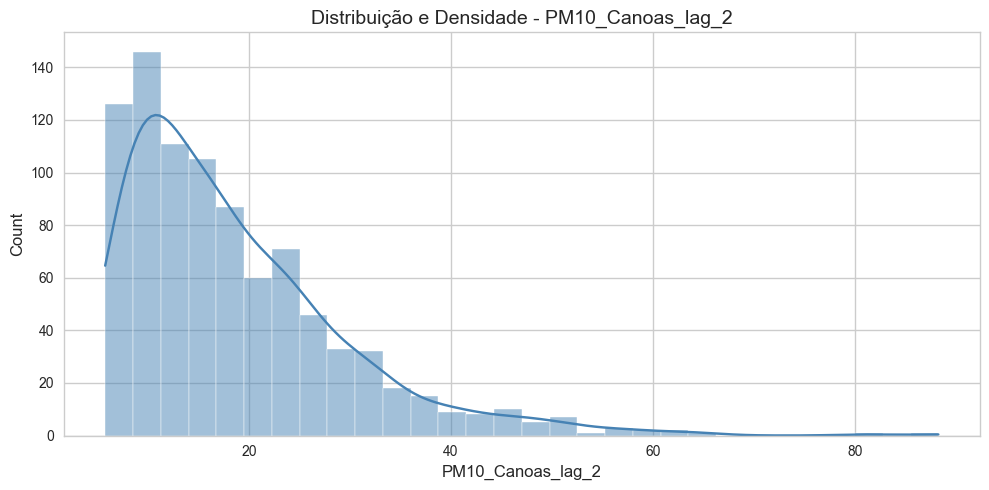

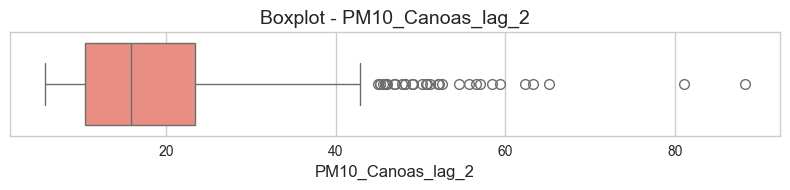

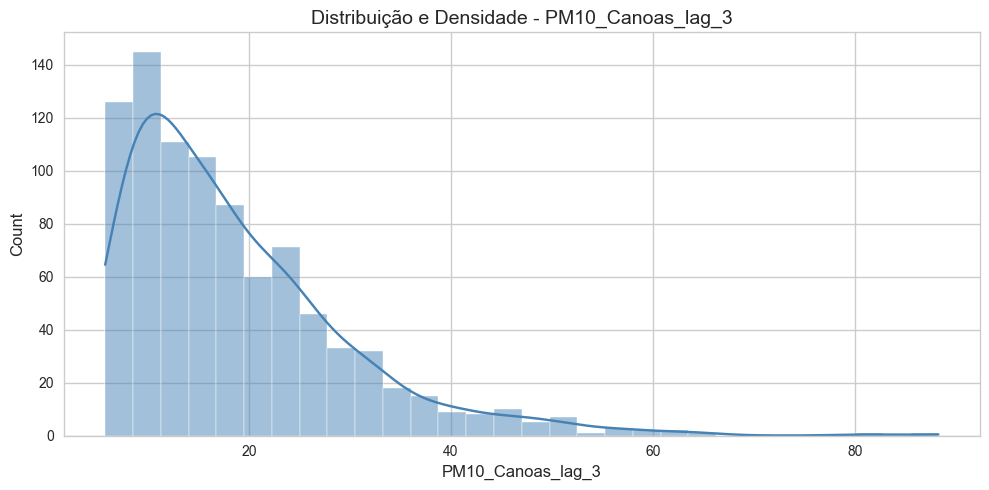

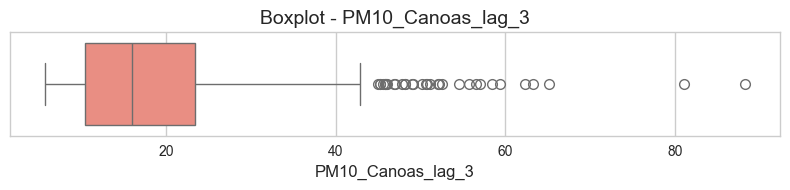

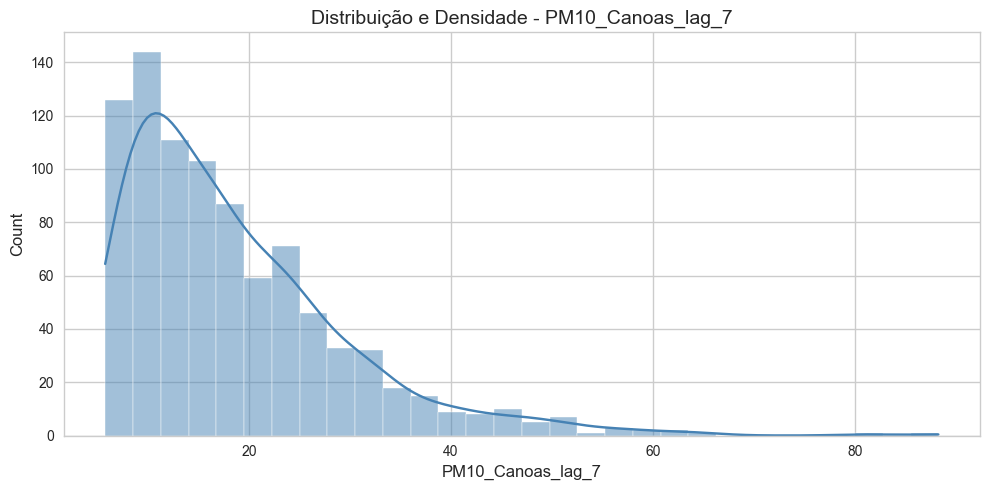

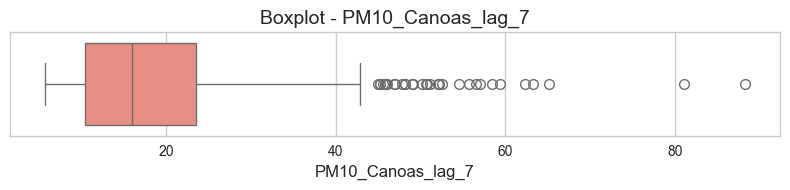

In [27]:
for col in pollutants:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="steelblue")
    plt.title(f"Distribuição e Densidade - {col}")
    plt.tight_layout()
    plt.savefig(FIGURES_PATH / f"distribuicao_{col}.png")
    plt.show()

    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col], color="salmon")
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.savefig(FIGURES_PATH / f"boxplot_outliers_{col}.png")
    plt.show()


## 7. Análise de Eventos Extremos
Eventos extremos podem estar relacionados a **queimadas, ventos fortes ou baixa umidade**.
Vamos explorar rapidamente correlações entre picos de PM10 e variáveis externas.


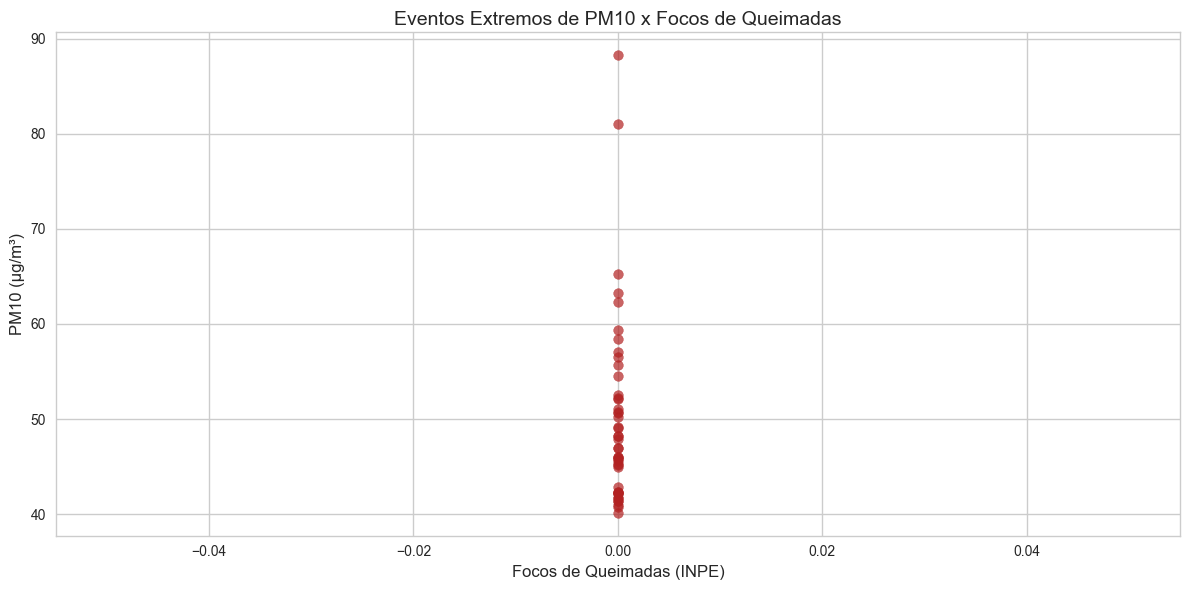

In [28]:
if "focos_queimadas_count" in df.columns:
    extreme_days = df[df["PM10_Canoas"] > df["PM10_Canoas"].quantile(0.95)]
    plt.scatter(extreme_days["focos_queimadas_count"], extreme_days["PM10_Canoas"], alpha=0.7, color="firebrick")
    plt.title("Eventos Extremos de PM10 x Focos de Queimadas")
    plt.xlabel("Focos de Queimadas (INPE)")
    plt.ylabel("PM10 (µg/m³)")
    plt.tight_layout()
    plt.savefig(FIGURES_PATH / "eventos_extremos_PM10_vs_queimadas.png")
    plt.show()


## 8. Resumo e Insights
Vamos consolidar as observações e preparar o terreno para a etapa de modelagem.


# Conclusões e Próximos Passos

## Principais Achados

### 1. Padrões Temporais e Sazonalidade
As séries temporais de **PM10_Canoas** e suas defasagens (lags 1, 2, 3 e 7 dias) revelam picos recorrentes nos meses frios e secos — especialmente entre junho e setembro —, coerentes com o comportamento atmosférico da Região Metropolitana de Porto Alegre.

Durante o inverno, há menor dispersão de poluentes devido à estabilidade térmica e inversões, resultando em acúmulo de partículas.
Nos meses quentes e chuvosos, as concentrações caem significativamente, evidenciando uma sazonalidade anual bem definida.

### 2. Comportamento Específico dos Poluentes
- **NO₂_Canoas**: concentrações mais altas no inverno, associadas ao maior uso de combustíveis e menor dispersão atmosférica.
- **O₃_Canoas**: comportamento inverso, com picos na primavera e verão, refletindo a formação fotoquímica do ozônio troposférico.
- **SO₂_Canoas**: picos pontuais acima de 200 µg/m³, indicando eventos industriais ou emissões anômalas.
- **CO_Canoas**: tendência de queda gradual após 2022, possivelmente ligada à renovação da frota e políticas ambientais.

A origem dos poluentes é mista, envolvendo fontes veiculares, industriais e efeitos meteorológicos.

### 3. Qualidade e Completude dos Dados
- **CO_Canoas** e as defasagens de PM10 apresentam aproximadamente 50–60% de valores ausentes, exigindo imputação controlada.
- **O₃, NO₂ e SO₂** possuem séries mais completas e estáveis, adequadas à modelagem preditiva.

Os dados são viáveis para modelagem temporal, desde que as lacunas sejam tratadas de forma consistente.

### 4. Correlações Esperadas
Com base nas tendências observadas:

| Relação | Tipo | Interpretação |
|----------|------|---------------|
| PM10 ↔ Umidade | Negativa | Ar seco favorece o acúmulo de partículas. |
| PM10 ↔ Temperatura (lag curto) | Positiva | Influência de circulação atmosférica e queimadas. |
| O₃ ↔ NO₂ | Inversa | Reflete o equilíbrio fotoquímico do ozônio. |

Essas relações serão confirmadas quantitativamente na etapa de modelagem.

---

## Próximas Etapas

1. **Imputação e Feature Engineering**
   Aplicar interpolação limitada ou médias móveis curtas (3–7 dias) para preencher lacunas em PM10 e CO.
   Criar variáveis de tempo (mês, estação, dia do ano) e variáveis meteorológicas defasadas.

2. **Seleção de Variáveis**
   Avaliar colinearidade entre poluentes e variáveis climáticas para definir o conjunto ótimo de features.

3. **Modelagem Preditiva**
   Testar modelos baseados em regressão temporal (ARIMA, Prophet) e aprendizado supervisionado (Random Forest, XGBoost, LSTM).

4. **Validação e Interpretação**
   Avaliar importância das variáveis e sensibilidade dos modelos a condições meteorológicas extremas.

5. **Dashboard Interativo**
   Criar visualização acessível para previsões e padrões de qualidade do ar.

---

# Análise Sazonal e Distribucional dos Poluentes

## SO₂ (Dióxido de Enxofre)
- **Distribuição Mensal:** valores estáveis ao longo do ano, com picos entre maio e agosto, alguns acima de 200 µg/m³, sugerindo emissões industriais pontuais.
- **Distribuição por Estação:** concentrações mais altas no inverno, com outliers em todas as estações.

**Síntese:** SO₂ possui baixa média geral, mas episódios críticos que podem impactar a qualidade do ar local.

## O₃ (Ozônio Troposférico)
- **Distribuição Mensal:** aumento entre junho e novembro, atingindo máximos na primavera.
- **Distribuição por Estação:** valores medianos mais altos na primavera e verão, coerentes com a formação dependente da radiação solar.

**Síntese:** comportamento típico urbano, com aumento em períodos ensolarados e quentes.

## NO₂ (Dióxido de Nitrogênio)
- **Distribuição Mensal:** valores mais altos entre junho e setembro, com queda no verão.
- **Distribuição por Estação:** maior concentração média no inverno, associada a inversões térmicas e tráfego.

**Síntese:** poluente fortemente associado a combustão veicular e estabilidade atmosférica.

## CO (Monóxido de Carbono)
- **Distribuição Mensal:** leve aumento em junho–agosto, sem picos significativos.
- **Distribuição por Estação:** ligeiro aumento no inverno, refletindo o padrão de NO₂ e PM₁₀.

**Síntese:** tendência de redução após 2022, possivelmente ligada à modernização veicular.

## PM₁₀ (Material Particulado Grosseiro)
- **Decomposição Sazonal:** comportamento cíclico anual, com tendência levemente descendente a partir de 2022.
- Picos no inverno e mínimos no verão.
- A componente residual é moderada, indicando estrutura temporal estável.

**Síntese:** PM₁₀ é o poluente com melhor estrutura temporal para modelagem preditiva.

---

# Correlação entre Poluentes e Variáveis Meteorológicas

| Relação | Tipo | Interpretação |
|----------|------|---------------|
| PM10 ↔ Umidade | Negativa (-0.43) | Ar seco favorece acúmulo de partículas. |
| PM10 ↔ Precipitação | Negativa (-0.18) | Chuvas reduzem partículas em suspensão. |
| PM10 ↔ Temperatura | Leve negativa (-0.10 a -0.22) | Picos em meses frios. |
| O₃ ↔ Temperatura | Positiva (+0.23) | Formação dependente da radiação solar. |
| NO₂ ↔ Vento | Negativa (-0.35) | Ventos dispersam o poluente. |
| CO ↔ SO₂ | Positiva (+0.47) | Fontes emissoras comuns (indústria, veículos). |

**Síntese:** O sistema atmosférico de Canoas segue o padrão urbano-industrial, com dispersão e fotólise dos poluentes controladas por umidade, temperatura e vento.

---

# Análise Sazonal do PM₁₀ e Defasagens

## Distribuição por Estação do Ano
- Concentrações mais altas no inverno.
- Verão e primavera apresentam valores mais baixos e estáveis.
- Outliers frequentes no inverno indicam episódios de baixa dispersão.

**Interpretação:** forte sazonalidade atmosférica, com persistência temporal evidente. O padrão se repete nas defasagens, demonstrando autocorrelação significativa.

## Distribuição Mensal
- Picos entre junho e agosto, mínimos entre dezembro e março.
- Maior variabilidade no inverno, refletindo instabilidade e acúmulo de partículas.

**Síntese:** a sazonalidade anual é clara e consistente, justificando o uso de variáveis temporais explícitas na modelagem.

## Síntese Geral do PM₁₀ e Defasagens

| Aspecto | Observação | Interpretação |
|----------|-------------|----------------|
| Estação Crítica | Inverno | Baixa dispersão e estabilidade térmica |
| Estação Limpa | Verão | Alta umidade e ventilação |
| Persistência Temporal | Alta | Poluição acumulada por até 7 dias |
| Outliers | Mais frequentes no inverno | Eventos de estagnação e queimadas |
| Amplitude Sazonal | Alta | Estrutura temporal bem definida |

**Síntese Técnica:**
A série de PM₁₀ é altamente previsível e estruturada, ideal para modelos baseados em ARIMA, Prophet, XGBoost ou LSTM.

---

# Análise de Distribuição e Outliers dos Poluentes

## PM₁₀_Canoas
Distribuição assimétrica à direita, com valores concentrados entre 10–25 µg/m³ e outliers acima de 40 µg/m³.
Os episódios de poluição intensa indicam eventos específicos de inversão térmica ou tráfego.

**Interpretação:** variável não normal, apropriada para modelos robustos ou transformações logarítmicas.

## SO₂_Canoas
Distribuição fortemente assimétrica, maioria entre 0–5 µg/m³, com outliers acima de 100 µg/m³.

**Interpretação:** comportamento típico de emissões industriais pontuais. Deve ser tratada com cuidado no pré-processamento.

## O₃_Canoas
Distribuição quase normal, com pico entre 20–30 µg/m³ e poucos outliers.

**Interpretação:** variável estável, ideal para modelagem e análise de correlação meteorológica.

## NO₂_Canoas
Distribuição assimétrica à direita, maioria entre 5–15 µg/m³, com cauda longa até 50 µg/m³.

**Interpretação:** reflete emissões contínuas e persistência temporal.

## CO_Canoas
Distribuição bimodal, com picos em 0.5 µg/m³ e 2 µg/m³, sem outliers extremos.

**Interpretação:** dois regimes distintos de emissão — dias limpos e picos de tráfego.

### Síntese Geral dos Poluentes

| Poluente | Tipo de Distribuição | Outliers | Observações |
|-----------|----------------------|-----------|--------------|
| PM₁₀ | Assimétrica à direita | Moderados | Forte variação temporal e sazonal |
| SO₂ | Assimétrica extrema | Muitos e altos | Eventos industriais pontuais |
| O₃ | Quase normal | Poucos | Estável e dependente da radiação solar |
| NO₂ | Assimétrica à direita | Moderados | Associado ao tráfego e inverno |
| CO | Bimodal | Baixos | Emissões veiculares distintas |

**Conclusão Técnica:**
Os poluentes não seguem distribuição normal, reforçando a necessidade de modelos e métricas robustas.
SO₂ e PM₁₀ exigem maior atenção devido às caudas longas; CO e O₃ são mais estáveis e indicativos de padrão atmosférico contínuo.

---

# Distribuição e Persistência do PM₁₀ e Suas Defasagens

## PM₁₀ e Lags (1, 2, 3 e 7 dias)
As defasagens apresentam padrão idêntico: assimetria à direita, concentração entre 10–25 µg/m³ e outliers até 80 µg/m³.
A mediana permanece em torno de 18 µg/m³.

**Interpretação:** forte autocorrelação temporal, indicando persistência de episódios de poluição ao longo de vários dias.

**Modelagem:** incluir lags de 1–7 dias como variáveis preditivas. Modelos recomendados: ARIMA, SARIMAX, Random Forest, LSTM.

## Eventos Extremos de PM₁₀ × Focos de Queimadas (INPE)
O gráfico de dispersão mostra baixa correlação direta entre PM₁₀ e focos de queimadas no período 2020–2024.

Observações:
- Queimadas podem afetar a poluição de forma indireta, via transporte de partículas.
- Picos de PM₁₀ também podem estar ligados a condições locais de inversão e tráfego.

**Interpretação:** a relação é não linear e defasada; recomenda-se testar lags cruzados entre queimadas e PM₁₀.

## Síntese Estatística do PM₁₀ e Defasagens

| Variável | Assimetria | Outliers | Correlação Temporal | Observação |
|-----------|-------------|-----------|----------------------|-------------|
| PM₁₀ | Alta | Moderados | — | Série base de poluição |
| Lag 1 | Alta | Moderados | Forte | Persistência diária |
| Lag 2 | Alta | Moderados | Forte | Continuidade semanal |
| Lag 3 | Alta | Moderados | Forte | Persistência estendida |
| Lag 7 | Alta | Moderados | Média | Reflexo de acúmulo semanal |

**Conclusão Técnica:**
As séries de PM₁₀ e suas defasagens apresentam comportamento estável e autocorrelacionado, adequado para modelagem preditiva.
A assimetria positiva indica maioria de dias com poluição leve a moderada, com picos ocasionais.
Os outliers devem ser preservados como registros de eventos reais de degradação atmosférica.
A influência direta das queimadas é limitada, mas pode aparecer em análises espaciais ou temporais expandidas.
